# Image Enhancement Model Training and PSNR Evaluation

In this notebook, we will:

1. Load and preprocess the dataset.
2. Train the original image enhancement model.
3. Evaluate the performance of the model using PSNR (Peak Signal-to-Noise Ratio).
4. Visualize the results.

### Import Necessary Libraries


In [1]:
from improved_qecnn import TrainImageImprovedEnhancementModel

2024-12-13 04:54:23.892512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-13 04:54:27.214804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA A100-SXM4-80GB, compute capability 8.0


Firstly, download the archibe of dataset by the url on Yandex Disk and unpack it. URL: https://disk.yandex.ru/d/CIkvXPX-iIbdfA

In [ ]:
!chmod +x unzip_dataset.sh
! ./unzip_dataset.sh

### Parameters and Folder Paths

We will define parameters like image dimensions, patch size, and the folder paths containing the YUV and PNG images for both training and testing.


In [2]:
# Train parameters
BATCH_SIZE = 128
EPOCHS = 200
LR = 1e-4
PATCH_SIZE = 40

TEST_FOLDER_RAW_PNG = './dataset/data_qecnn/testrawpng/'
TEST_FOLDER_COMP_PNG = './dataset/data_qecnn/testcomppng/'
TRAIN_FOLDER_RAW_PNG = './dataset/data_qecnn/trainrawpng/'
TRAIN_FOLDER_COMP_PNG = './dataset/data_qecnn/traincomppng/'

Loading raw train images...
Loading compressed train images...
Loading raw validation images...
Loading compressed validation images...


2024-12-13 05:05:14.583557: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79262 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:8c:00.0, compute capability: 8.0


Training improved model...
Epoch 1/200


2024-12-13 05:05:27.053795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2024-12-13 05:05:28.727451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-13 05:05:29.866631: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ff140b6a4a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-13 05:05:29.866671: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-12-13 05:05:30.060134: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-13 05:05:31.603456: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the pro

540/540 [==============================] - ETA: 0s - loss: 0.0592 - psnr: 22.9112
Epoch 1: val_loss improved from inf to 0.05018, saving model to best_improved_model.weights.h5
540/540 [==============================] - 92s 124ms/step - loss: 0.0592 - psnr: 22.9112 - val_loss: 0.0502 - val_psnr: 21.5033
Epoch 2/200
539/540 [============================>.] - ETA: 0s - loss: 0.0396 - psnr: 24.8408
Epoch 2: val_loss improved from 0.05018 to 0.03583, saving model to best_improved_model.weights.h5
540/540 [==============================] - 64s 119ms/step - loss: 0.0396 - psnr: 24.8406 - val_loss: 0.0358 - val_psnr: 23.1663
Epoch 3/200
539/540 [============================>.] - ETA: 0s - loss: 0.0305 - psnr: 25.1463
Epoch 3: val_loss improved from 0.03583 to 0.02884, saving model to best_improved_model.weights.h5
540/540 [==============================] - 64s 119ms/step - loss: 0.0305 - psnr: 25.1462 - val_loss: 0.0288 - val_psnr: 22.9363
Epoch 4/200
539/540 [============================>.] 

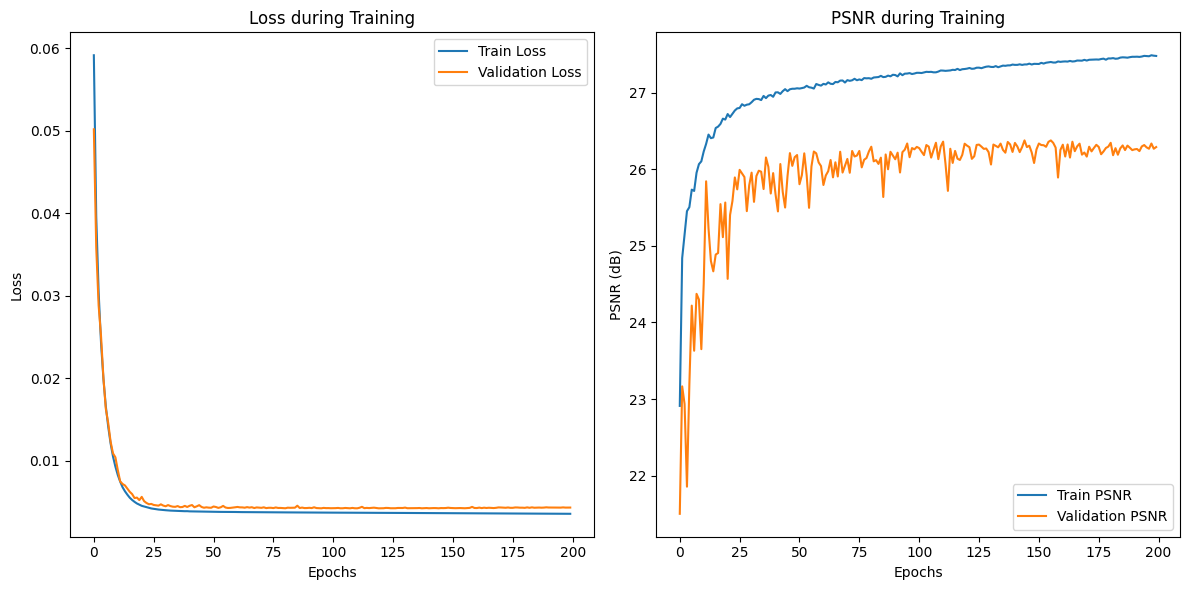

In [3]:
model = TrainImageImprovedEnhancementModel(EPOCHS, BATCH_SIZE, LR, TRAIN_FOLDER_RAW_PNG, TRAIN_FOLDER_COMP_PNG, TEST_FOLDER_RAW_PNG, TEST_FOLDER_COMP_PNG, PATCH_SIZE)